In [16]:
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('matches1.csv')

In [19]:
pdf = pd.read_csv('../player_scrapers/rankings.csv')

In [20]:
dftmp = df[df['best_of'] == 3]

<Axes: >

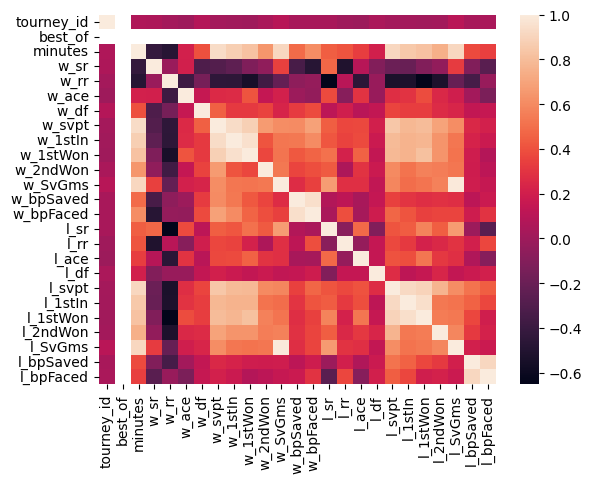

In [21]:
sns.heatmap(dftmp.corr(numeric_only=True))

In [22]:
rating_diff = dftmp['w_sr'] - dftmp['l_rr']
dftmp['w_sr_diff'] = rating_diff

/var/folders/6g/wjnwh0cd51vgnl0l7xmh2gm40000gp/T/ipykernel_43898/2078685173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftmp['w_sr_diff'] = rating_diff


In [23]:
rating_diff_loser = dftmp['l_sr'] - dftmp['w_rr']
dftmp['l_sr_diff'] = rating_diff_loser

/var/folders/6g/wjnwh0cd51vgnl0l7xmh2gm40000gp/T/ipykernel_43898/2204135755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftmp['l_sr_diff'] = rating_diff_loser


In [24]:
dftmp.columns

Index(['tourney_id', 'matchId', 'tourney_name', 'surface', 'winner_id',
       'loser_id', 'best_of', 'minutes', 'w_sr', 'w_rr', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_sr', 'l_rr', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn',
       'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'w_sr_diff', 'l_sr_diff'],
      dtype='object')

In [25]:
dftmp[['w_ace','w_sr_diff', 'w_sr']].corr()

,w_ace,w_sr_diff,w_sr
w_ace,1.000000,0.162309,0.205220
w_sr_diff,0.162309,1.000000,0.838918
w_sr,0.205220,0.838918,1.000000


In [26]:
dftmp[['l_ace','l_sr_diff', 'l_sr']].corr()

,l_ace,l_sr_diff,l_sr
l_ace,1.000000,0.517324,0.479787
l_sr_diff,0.517324,1.000000,0.898934
l_sr,0.479787,0.898934,1.000000


In [27]:
dftmp[dftmp['w_sr'] == 0]

,tourney_id,matchId,tourney_name,surface,winner_id,loser_id,best_of,minutes,w_sr,w_rr,...,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,w_sr_diff,l_sr_diff


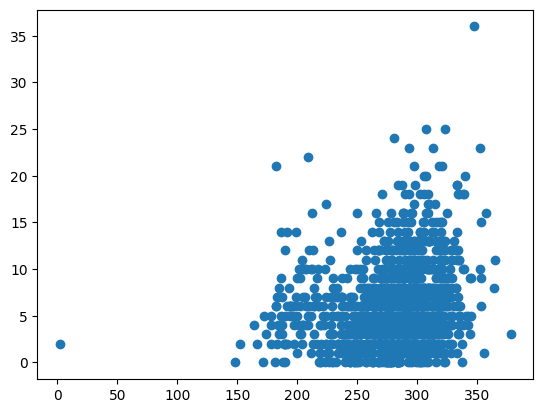

In [28]:
plt.scatter(dftmp['w_sr'],dftmp['w_ace'])

In [29]:
dftmp[dftmp['w_ace'] > 30]

,tourney_id,matchId,tourney_name,surface,winner_id,loser_id,best_of,minutes,w_sr,w_rr,...,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,w_sr_diff,l_sr_diff
46,339,ms021,Brisbane,Hard,m0gz,ke17,3,147.0,347,48,...,0,107,81,67,18,18,2,2,299,295


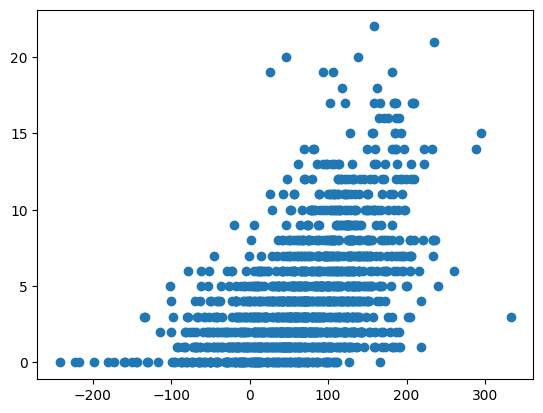

In [30]:
plt.scatter(dftmp['l_sr_diff'],dftmp['l_ace'])

In [31]:
dftmp[['winner_id','w_sr']]

,winner_id,w_sr
0,fb98,310
1,fb98,281
2,hb71,339
3,m0fh,324
4,hb71,338
...,...,...
1519,cg80,297
1520,c0c8,319
1521,f510,263
1522,r0eb,317


In [32]:
pdf[pdf['id'] == 'fb98']

,id,name,age,points,hand,backhand,height,weight
3,fb98,Taylor Fritz,27,5280,R,2,196.0,86.0


In [33]:
(dftmp['w_ace'].sum() - dftmp['l_ace'].sum())/len(dftmp)

1.4407142857142856

In [34]:
## average of 1.44 more aces

In [35]:
dftmp = dftmp.drop('w_height',axis=1)

KeyError: "['w_height'] not found in axis"

In [ ]:
z = [i for i in range(0,10)]
z

In [36]:
d = []
avHeight = pdf['height'].sum()/len(pdf)
for val in dftmp['winner_id']:
    l = pdf[pdf['id'] == val]['height']
    if(len(l) > 0):
        d.append(l.iloc[0])
    else:
        d.append(avHeight)
d = pd.DataFrame({'w_height':d})
d

,w_height
0,196.0
1,196.0
2,196.0
3,183.0
4,196.0
...,...
1395,188.0
1396,183.0
1397,178.0
1398,188.0


In [37]:
dftmp.reset_index(drop=True,inplace=True)

In [38]:
newdf = pd.concat([dftmp, d], axis=1)
newdf

,tourney_id,matchId,tourney_name,surface,winner_id,loser_id,best_of,minutes,w_sr,w_rr,...,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,w_sr_diff,l_sr_diff,w_height
0,9900,ms011,United Cup,Hard,fb98,hb71,3,138.0,310,113,...,96,64,51,20,17,1,2,146,208,196.0
1,9900,ms021,United Cup,Hard,fb98,m0fh,3,111.0,281,181,...,79,52,35,14,12,1,4,159,82,196.0
2,9900,ms031,United Cup,Hard,hb71,s0h2,3,58.0,339,199,...,49,34,18,9,8,1,4,292,45,196.0
3,9900,ms051,United Cup,Hard,m0fh,c0e9,3,54.0,324,267,...,35,19,10,6,7,0,4,278,-83,183.0
4,9900,ms071,United Cup,Hard,hb71,hd68,3,105.0,338,115,...,79,54,42,12,12,2,3,282,175,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1536,qs037,ATP Masters 1000 Madrid,Clay,cg80,v0am,3,151.0,297,128,...,106,49,36,30,16,10,14,203,125,188.0
1396,1536,qs043,ATP Masters 1000 Madrid,Clay,c0c8,sx91,3,90.0,319,149,...,53,38,27,10,10,1,3,262,140,183.0
1397,1536,qs041,ATP Masters 1000 Madrid,Clay,f510,rc04,3,91.0,263,205,...,75,56,35,4,9,5,9,115,9,178.0
1398,1536,qs053,ATP Masters 1000 Madrid,Clay,r0eb,da81,3,73.0,317,170,...,59,32,21,12,8,4,7,260,56,188.0


In [39]:
newdf['w_height']

0       196.0
1       196.0
2       196.0
3       183.0
4       196.0
        ...  
1395    188.0
1396    183.0
1397    178.0
1398    188.0
1399    191.0
Name: w_height, Length: 1400, dtype: float64

In [40]:
newdf[['w_height','w_sr', 'w_ace', 'w_sr_diff']].corr()

,w_height,w_sr,w_ace,w_sr_diff
w_height,1.000000,0.188467,0.354110,0.170234
w_sr,0.188467,1.000000,0.205220,0.838918
w_ace,0.354110,0.205220,1.000000,0.162309
w_sr_diff,0.170234,0.838918,0.162309,1.000000


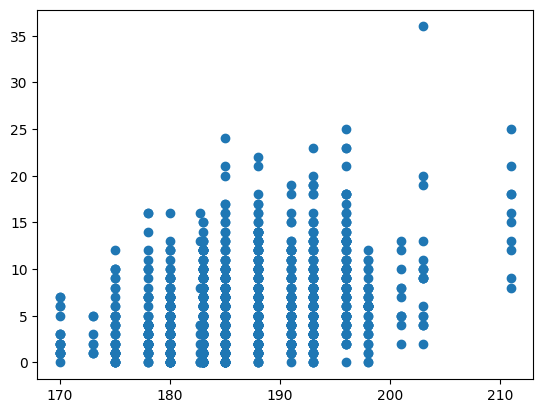

In [41]:
plt.scatter(newdf['w_height'],newdf['w_ace'])

In [42]:
print(avHeight)

182.702


In [43]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder

In [44]:
oe = OrdinalEncoder(categories=[['nil','Clay','Hard','Grass']])
oe.fit([['nil'],['Clay'],['Hard'],['Grass']])

OrdinalEncoder(categories=[['nil', 'Clay', 'Hard', 'Grass']])

In [45]:
newdf['surface_enc'] = oe.fit_transform(newdf[['surface']])

In [46]:
print('VARIANCE INFLATION FACTOR(S):\n')


target_features = ['w_height','w_sr', 'w_ace', 'surface_enc', 'l_rr']
for feature in target_features:
    reg = linear_model.LinearRegression()
    reg.fit(newdf[[f for f in target_features if f != feature]], newdf[feature])
    y_pred = reg.predict(newdf[[f for f in target_features if f != feature]])
    r2 = r2_score(newdf[feature],y_pred)
    print(feature, ' ', 1/(1-r2))
    

VARIANCE INFLATION FACTOR(S):

w_height   1.1630483887473462
w_sr   1.4461276205660178
w_ace   1.2659479582798483
surface_enc   1.1106059060182933
l_rr   1.3878102094761122


In [ ]:
# no variance inflation factors that are greater than 5, so all features are fine to use

In [47]:
reg = linear_model.LinearRegression()
reg.fit(newdf[['w_height','w_sr','surface_enc', 'l_rr']], newdf['w_ace'])

LinearRegression()

In [48]:
reg.predict(pd.DataFrame({'w_height':[185],'w_sr':[270],'surface_enc':[2],'l_rr':[50]}))
# [[185,270,2,50]]

array([5.8569585])

In [49]:
y_pred = reg.predict(newdf[['w_height','w_sr','surface_enc', 'l_rr']])
r2_score(newdf['w_ace'],y_pred)

0.2100781130380861

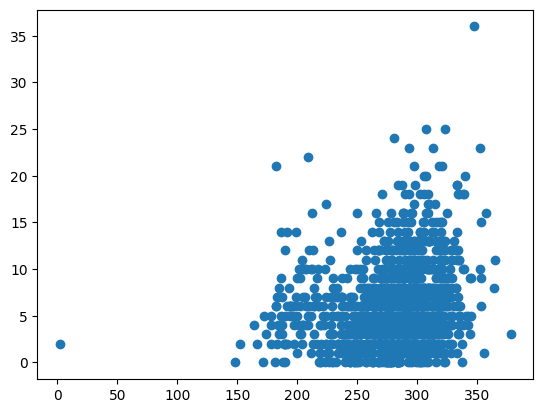

In [50]:
plt.scatter(newdf['w_sr'],newdf['w_ace'])

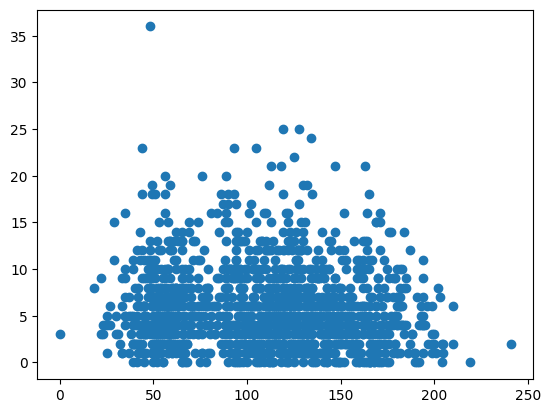

In [51]:
plt.scatter(newdf['l_rr'], newdf['w_ace'])

In [52]:
newdf[['l_rr','w_ace']].corr()

,l_rr,w_ace
l_rr,1.000000,-0.089811
w_ace,-0.089811,1.000000
